In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
import matplotlib
from pylab import *
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv("AdmissionDataset/data.csv")
threshold = 0.5
learning_rate = 0.01
iterations = 1000

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [25]:
def gradient_decent(X_train,Y_train,theta,learning_rate,iterations):
    cost = np.zeros(iterations)
    for i in range(iterations):
        h = sigmoid(np.dot(X_train,theta.T))
        theta = theta - (learning_rate/len(X_train)) * np.dot(X_train.T, (h - Y_train))
    
    return theta

In [26]:
# g = gradient_decent(X_train,Y_train,theta,learning_rate,iterations)
# g = g[0]

In [27]:
threshold = 0.45
precesion = []
recall = []
while threshold <= 1:
    
    X = df.drop(['Chance of Admit ','Serial No.'],axis=1)
    Y = df['Chance of Admit ']
    Y = list(Y)

    for i in range(len(Y)):
        if float(Y[i])>threshold:
            Y[i]=1
        else:
            Y[i]=0


    Y = pd.DataFrame({'Chance of Admit ':Y})
    Y = Y['Chance of Admit ']
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

    X_train = (X_train - X_train.mean())/X_train.std()
    X_test = (X_test - X_test.mean())/X_test.std()


    X_train = pd.concat([X_train,Y_train],axis=1)
    ones = np.ones([X_train.shape[0],1])
    Y_train = X_train.iloc[:,7:8].values
    X_train = X_train.iloc[:,0:7]
    X_train = np.concatenate((ones,X_train),axis=1)

    # theta = np.zeros(8) # 7 is the number of features
    theta = np.zeros([1,8])
    # theta.shape

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def gradient_decent(X_train,Y_train,theta,learning_rate,iterations):

        for i in range(iterations):
            h = sigmoid(np.dot(X_train,theta.T))
            theta = theta - (learning_rate/len(X_train)) * np.sum(X_train * (h - Y_train), axis=0)

        return theta

    g = gradient_decent(X_train,Y_train,theta,learning_rate,iterations)
    g = g[0]


    y_pred = []
    for index,rows in X_test.iterrows():
        y = 0
        rows = list(rows)
        for i in range(len(rows)):
            y = y + rows[i]*g[i+1]
        y = y + g[0]
    #     print(y)
        y = sigmoid(y)
        if y > threshold:
            y_pred.append(1)
        else:
            y_pred.append(0)
    threshold = threshold + 0.05
    score = precision_score(Y_test,y_pred)
    print("-----")
    print(score)
    precesion.append(score)
    score = recall_score(Y_test,y_pred)
    recall.append(score)
    print(score)

-----
0.9666666666666667
1.0
-----
0.9111111111111111
1.0
-----
0.9012345679012346
0.9605263157894737
-----
0.8615384615384616
0.7887323943661971
-----
0.9555555555555556
0.7166666666666667
-----
0.9743589743589743
0.76
-----
0.9666666666666667
0.7435897435897436
-----
1.0
0.5483870967741935
-----
1.0
0.4666666666666667
-----
0.0
0.0
-----
0.0
0.0


Text(0.5, 1.0, 'Threshold-Value vs Precision vs Recall')

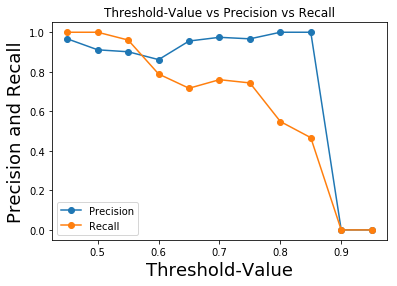

In [28]:
fig, ax = plt.subplots()
x_axis = []
thres = 0.45
while thres <= 1:
    x_axis.append(thres)
    thres = thres + 0.05
ax.plot(x_axis, precesion,label="Precision",marker='o')
ax.plot(x_axis, recall,label="Recall",marker='o')
ax.legend(loc=0)
ax.set_xlabel("Threshold-Value", fontsize=18)
ax.set_ylabel("Precision and Recall", fontsize=18)
ax.set_title('Threshold-Value vs Precision vs Recall')